# Modelos no supervizados
El set de datos datos clustering.csv contiene 1000 observaciones simuladas, en la que se poseen 10 atributos numéricos llamadas V1 a V10, además, del atributo y que indica el grupo real de la observación.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Importar datos
df = pd.read_csv('data/datos_clustering.csv')
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
0,0,-4.554889,4.100700,-3.134432,-1.313845,-9.391112,2.519540,1.308041,0.926173,7.067234,3.509057,3
1,1,10.766431,4.114985,-0.145851,6.064239,-4.482858,2.045298,-8.068677,7.231181,-1.361735,-1.031854,2
2,2,8.697494,6.927252,0.081115,8.782801,-6.016109,2.765242,-9.023664,9.352678,-1.699800,-0.519918,2
3,3,7.887380,0.888983,0.613888,6.976301,-11.153522,-5.858364,-12.793676,4.969787,1.399372,6.831188,1
4,4,3.432427,3.062779,0.881139,-0.040477,-4.844429,2.057529,-2.111636,8.952105,10.530478,-2.324382,0


In [104]:
# Info de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   V1          1000 non-null   float64
 2   V2          1000 non-null   float64
 3   V3          1000 non-null   float64
 4   V4          1000 non-null   float64
 5   V5          1000 non-null   float64
 6   V6          1000 non-null   float64
 7   V7          1000 non-null   float64
 8   V8          1000 non-null   float64
 9   V9          1000 non-null   float64
 10  V10         1000 non-null   float64
 11  y           1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [105]:
# Verificar si hay datos faltantes
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
y             0
dtype: int64

In [106]:
# Shape de los datos
df.shape

(1000, 12)

# Pregunta 1
Realice un análisis de componentes principales seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.


In [107]:
# Eliminar la columna 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [108]:
# Separar las características del grupo real de observacion
X = df.drop('y', axis=1)  # Datos de características
y = df['y']  # Grupo real de observacion

In [109]:
# Importar StandardScaler para estandarizar los datos
from sklearn.preprocessing import StandardScaler

In [110]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
# Importar PCA
from sklearn.decomposition import PCA

In [112]:
# Realizar PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

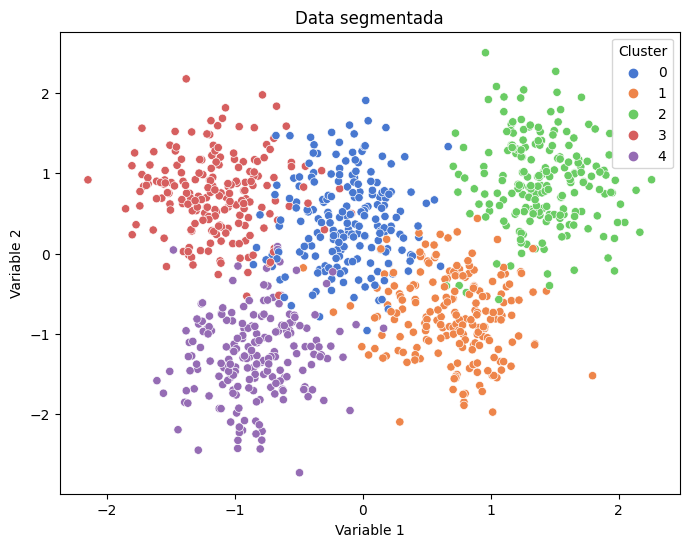

In [113]:
# Gráfico de los clusters

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x   = X_scaled[:, 0],
    y   = X_scaled[:, 1],
    hue = y,
    palette="muted",
)
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.set_title("Data segmentada")
ax.legend(title="Cluster")

In [114]:
# Determinar el número de componentes para alcanzar al menos el 70% de variabilidad
explained_variance = pca.explained_variance_ratio_
cumulative_variance = 0
num_components = 0

for i, ev in enumerate(explained_variance):
    cumulative_variance += ev
    num_components = i + 1
    if cumulative_variance >= 0.7:
        break

print(f'Se necesitan {num_components} componentes para explicar al menos el 70% de la variabilidad.')

# Reducir la dimensionalidad a estos componentes
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

Se necesitan 3 componentes para explicar al menos el 70% de la variabilidad.


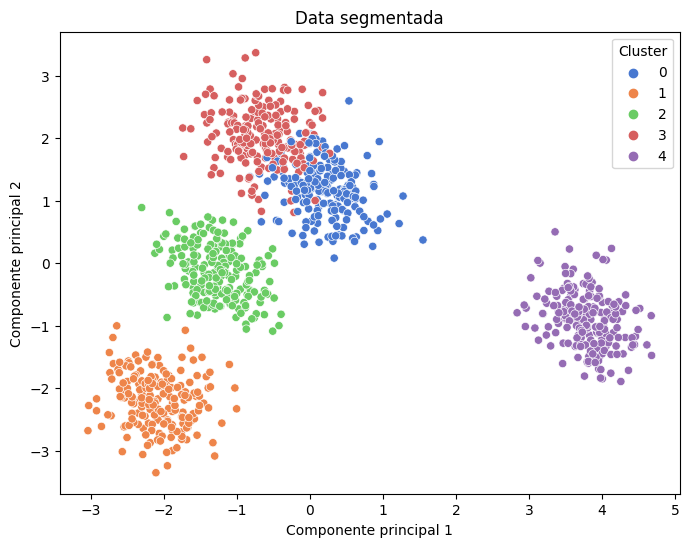

In [115]:
# Graficar pca 2D los tres componentes principales
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x   = X_pca[:, 0],
    y   = X_pca[:, 1],
    hue = y,
    palette="muted",
)
ax.set_xlabel("Componente principal 1")
ax.set_ylabel("Componente principal 2")
ax.set_title("Data segmentada")
ax.legend(title="Cluster")



# Pregunta 2
Detecte el número optimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.



In [116]:
# Detectar numero de cluster de PCA make pipeline y escalar
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Crear el pipeline
pipeline_km = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=2023))

# Ajustar el pipeline
pipeline_km.fit(X_pca)
scaler = pipeline_km[0]
kmeans = pipeline_km[1]

# Extraer las etiquetas
labels = pipeline_km.predict(X_pca)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [117]:
kmeans.cluster_centers_

array([[-0.27640305,  0.66010684,  0.30054815],
       [-1.00018315, -1.40507644, -0.82211048],
       [ 1.8293923 , -0.57524408, -0.07953396]])

In [118]:
centroides_estand = kmeans.cluster_centers_
centroides = scaler.inverse_transform(centroides_estand)
print(centroides)

[[-0.57305046  1.02961309  0.37150567]
 [-2.07362188 -2.19159234 -1.01620557]
 [ 3.79277327 -0.89724692 -0.09831142]]


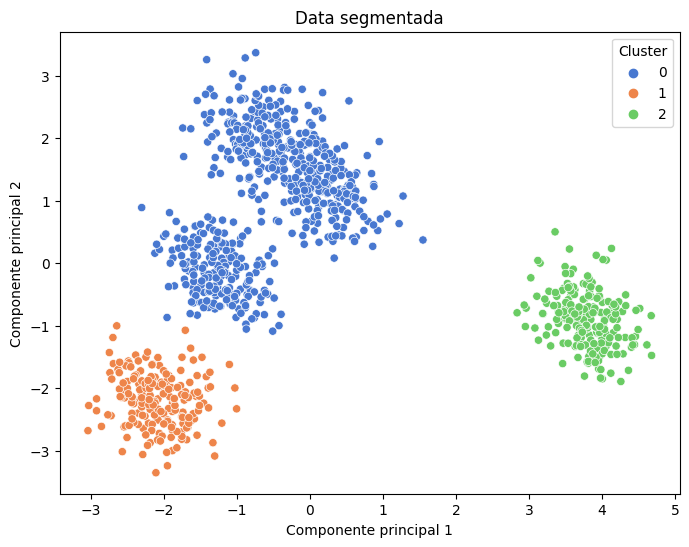

In [119]:

# Graficar los clusters
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x   = X_pca[:, 0],
    y   = X_pca[:, 1],
    hue = labels,
    palette="muted",
)
ax.set_xlabel("Componente principal 1")
ax.set_ylabel("Componente principal 2")
ax.set_title("Data segmentada")
ax.legend(title="Cluster")




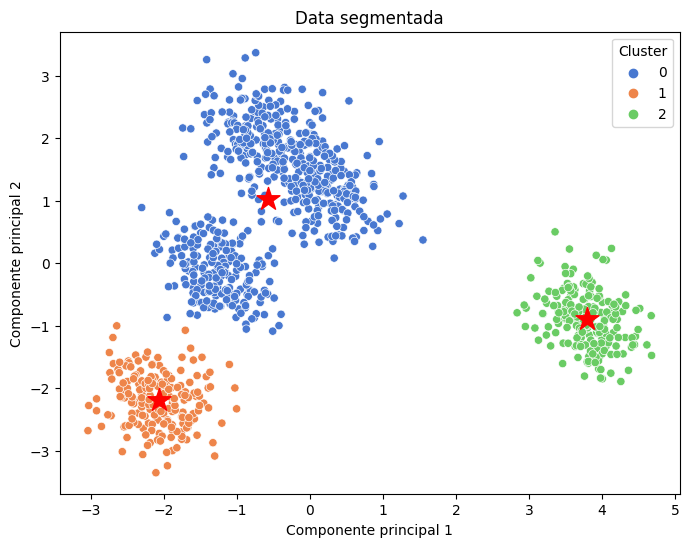

In [120]:
# Imprimir centroides con * 
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x   = X_pca[:, 0],
    y   = X_pca[:, 1],
    hue = labels,
    palette="muted",
)
ax.set_xlabel("Componente principal 1")
ax.set_ylabel("Componente principal 2")
ax.set_title("Data segmentada")
ax.legend(title="Cluster")
ax.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=300, c='r')



In [124]:
import warnings

warnings.filterwarnings("ignore")

from estyp.cluster import NClusterSearch

searcher = NClusterSearch(
    estimator    = pipeline_km,
    method       = "elbow",#silhouette
    min_clusters = 1,
    max_clusters = 10,
    random_state = 2023
)
searcher.fit(X_pca)
searcher.plot()

Exception: The estimator 'Pipeline' is not implemented yet.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

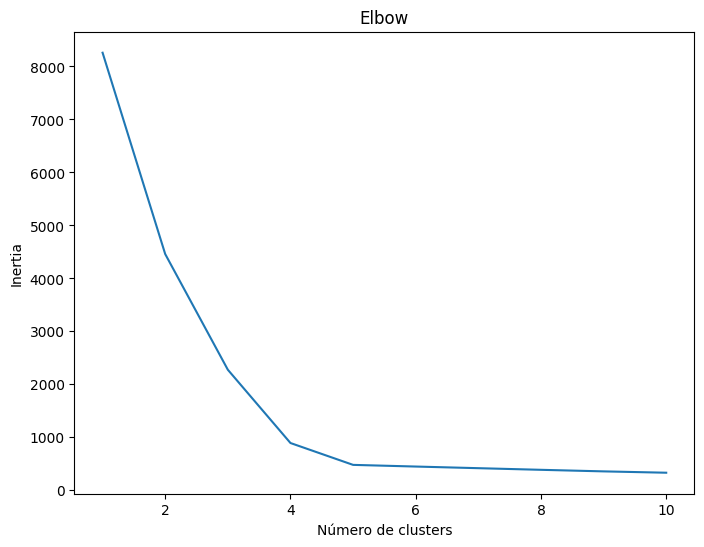

In [ ]:
# Detectar el número de clusters de PCA con Elbow y Average Silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=2023).fit(X_pca)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.show()




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

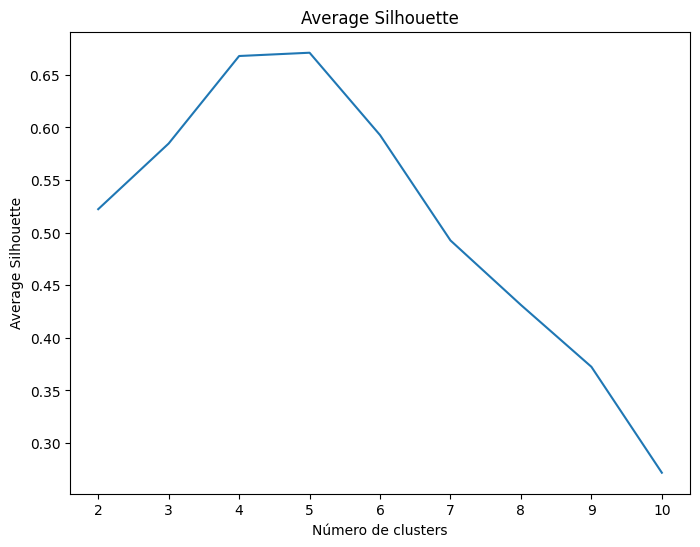

In [ ]:
# Average Silhouette
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=2023).fit(X_pca)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette)
plt.xlabel('Número de clusters')
plt.ylabel('Average Silhouette')
plt.title('Average Silhouette')
plt.show()

# Pregunta 3
Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados, qué puede concluir al respecto?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


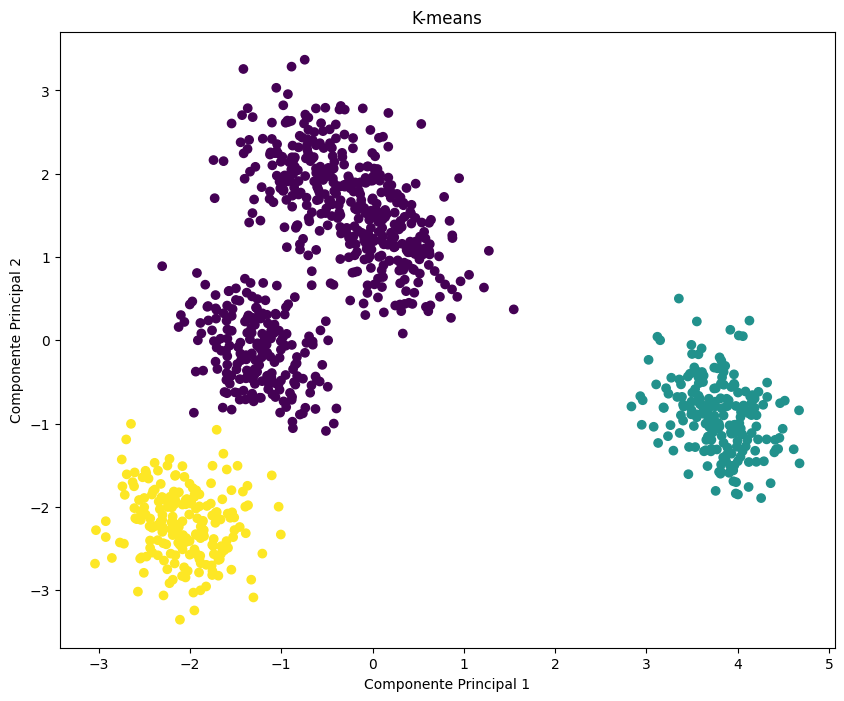

In [ ]:
# Ajustar clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means')
plt.show()
